In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-data-set/IPL_2008_2019/598021.csv
/kaggle/input/ipl-data-set/IPL_2008_2019/1175364.csv
/kaggle/input/ipl-data-set/IPL_2008_2019/501249.csv
/kaggle/input/ipl-data-set/IPL_2008_2019/598007.csv
/kaggle/input/ipl-data-set/IPL_2008_2019/1136578.csv
/kaggle/input/ipl-data-set/IPL_2008_2019/1136614.csv
/kaggle/input/ipl-data-set/IPL_2008_2019/734011.csv
/kaggle/input/ipl-data-set/IPL_2008_2019/1082646.csv
/kaggle/input/ipl-data-set/IPL_2008_2019/981007.csv
/kaggle/input/ipl-data-set/IPL_2008_2019/336022.csv
/kaggle/input/ipl-data-set/IPL_2008_2019/980919.csv
/kaggle/input/ipl-data-set/IPL_2008_2019/734007.csv
/kaggle/input/ipl-data-set/IPL_2008_2019/1136570.csv
/kaggle/input/ipl-data-set/IPL_2008_2019/1136599.csv
/kaggle/input/ipl-data-set/IPL_2008_2019/392186.csv
/kaggle/input/ipl-data-set/IPL_2008_2019/392206.csv
/kaggle/input/ipl-data-set/IPL_2008_2019/1175371.csv
/kaggle/input/ipl-data-set/IPL_2008_2019/980953.csv
/kaggle/input/ipl-data-set/IPL_2008_2019/598059.csv
/kagg

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import warnings
warnings.filterwarnings("ignore")

Concatenate all the files into one dataframe¶


In [3]:
path = '../input/ipl-data-set/IPL_2008_2019' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

match_data = pd.concat(li, axis=0, ignore_index=True)


In [4]:
match_data.shape

(177859, 8)

Check for null values and datatype consistency¶


In [5]:
match_data.isnull().sum()


Inning          0
Over            0
Batting_Team    0
Player          0
Non_Striker     0
Baller          0
Runs            0
Extra           0
dtype: int64

In [6]:
match_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177859 entries, 0 to 177858
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Inning        177859 non-null  int64  
 1   Over          177859 non-null  float64
 2   Batting_Team  177859 non-null  object 
 3   Player        177859 non-null  object 
 4   Non_Striker   177859 non-null  object 
 5   Baller        177859 non-null  object 
 6   Runs          177859 non-null  int64  
 7   Extra         177859 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 10.9+ MB


Total runs scored by the teams over the years¶


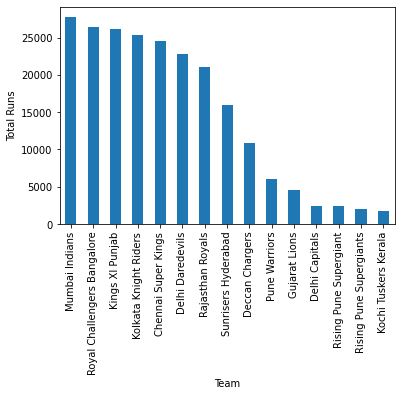

In [7]:
match_data.groupby("Batting_Team").Runs.sum().sort_values(ascending=False).plot.bar()
plt.xlabel("Team")
plt.ylabel("Total Runs")
plt.show()


Mumbai Indians has the highest combined total of runs in IPL



Runs scored by players (Top 50)¶


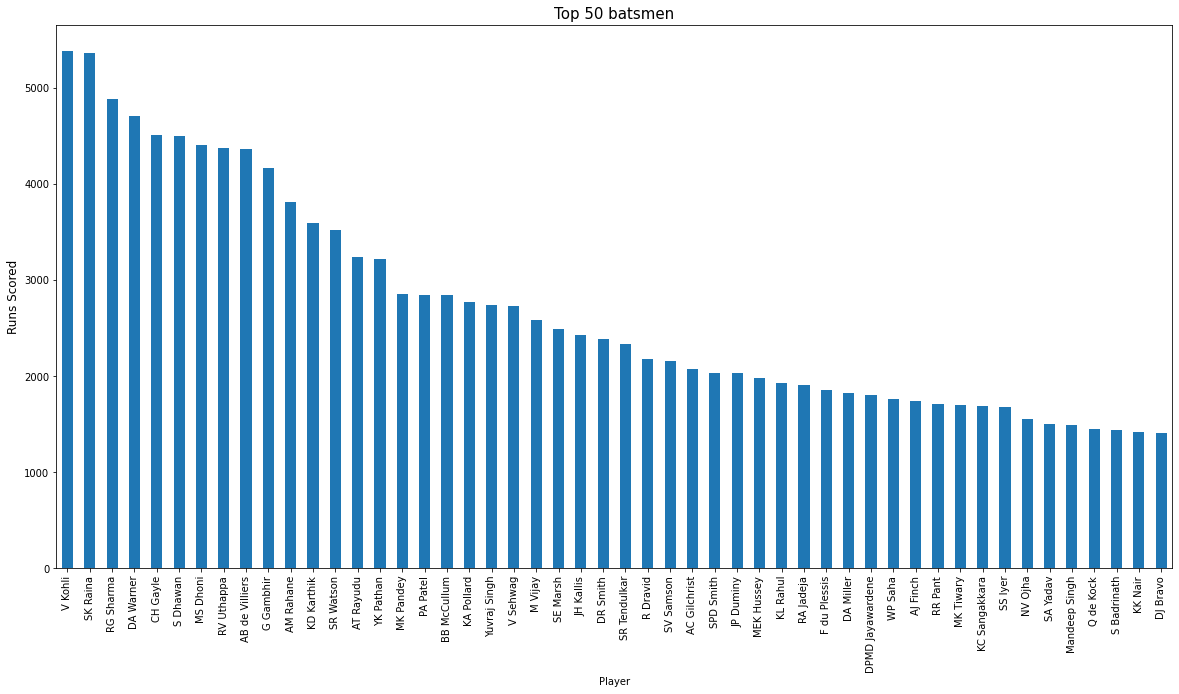

In [8]:
plt.figure(figsize=(20,10))
top_scorers = match_data.groupby("Player").Runs.sum().sort_values(ascending=False).head(50)
top_scorers.plot.bar()
plt.ylabel("Runs Scored",fontsize=12)
plt.title("Top 50 batsmen",fontsize=15)
plt.show()


Maximum Boundaries by Players¶


In [9]:
match_data["Four"] = match_data.Runs.apply(lambda x : 1 if x==4 else 0)
match_data.head()


,Inning,Over,Batting_Team,Player,Non_Striker,Baller,Runs,Extra,Four
0,1,0.1,Kings XI Punjab,Mandeep Singh,AC Gilchrist,GH Vihari,0,0,0
1,1,0.2,Kings XI Punjab,Mandeep Singh,AC Gilchrist,GH Vihari,0,0,0
2,1,0.3,Kings XI Punjab,Mandeep Singh,AC Gilchrist,GH Vihari,1,0,0
3,1,0.4,Kings XI Punjab,AC Gilchrist,Mandeep Singh,GH Vihari,0,0,0
4,1,0.5,Kings XI Punjab,AC Gilchrist,Mandeep Singh,GH Vihari,1,0,0


In [10]:
match_data["Six"] = match_data.Runs.apply(lambda x : 1 if x==6 else 0)
match_data.head()


,Inning,Over,Batting_Team,Player,Non_Striker,Baller,Runs,Extra,Four,Six
0,1,0.1,Kings XI Punjab,Mandeep Singh,AC Gilchrist,GH Vihari,0,0,0,0
1,1,0.2,Kings XI Punjab,Mandeep Singh,AC Gilchrist,GH Vihari,0,0,0,0
2,1,0.3,Kings XI Punjab,Mandeep Singh,AC Gilchrist,GH Vihari,1,0,0,0
3,1,0.4,Kings XI Punjab,AC Gilchrist,Mandeep Singh,GH Vihari,0,0,0,0
4,1,0.5,Kings XI Punjab,AC Gilchrist,Mandeep Singh,GH Vihari,1,0,0,0


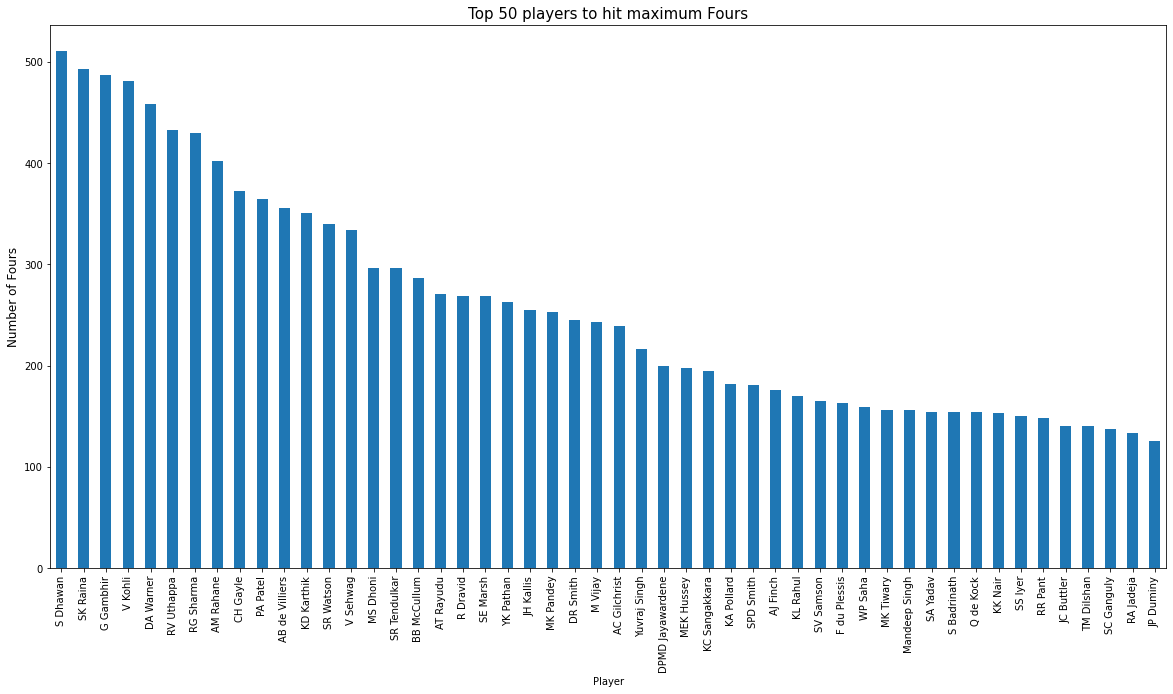

In [11]:
plt.figure(figsize=(20,10))
match_data.groupby("Player").Four.sum().sort_values(ascending=False).head(50).plot.bar()
plt.ylabel("Number of Fours",fontsize=12)
plt.title("Top 50 players to hit maximum Fours",fontsize=15)
plt.show()


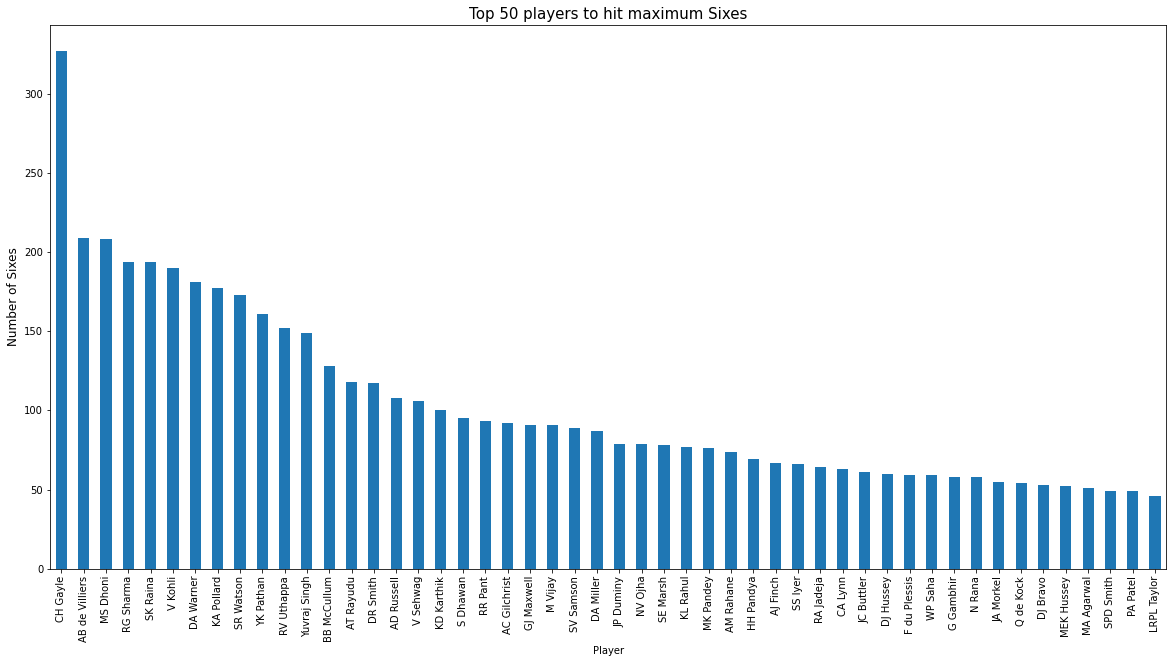

In [12]:
plt.figure(figsize=(20,10))
match_data.groupby("Player").Six.sum().sort_values(ascending=False).head(50).plot.bar()
plt.ylabel("Number of Sixes",fontsize=12)
plt.title("Top 50 players to hit maximum Sixes",fontsize=15)
plt.show()

Economy rate of bowlers¶


In [13]:
match_data["Bowl_Count"] = 1
match_data.head()


,Inning,Over,Batting_Team,Player,Non_Striker,Baller,Runs,Extra,Four,Six,Bowl_Count
0,1,0.1,Kings XI Punjab,Mandeep Singh,AC Gilchrist,GH Vihari,0,0,0,0,1
1,1,0.2,Kings XI Punjab,Mandeep Singh,AC Gilchrist,GH Vihari,0,0,0,0,1
2,1,0.3,Kings XI Punjab,Mandeep Singh,AC Gilchrist,GH Vihari,1,0,0,0,1
3,1,0.4,Kings XI Punjab,AC Gilchrist,Mandeep Singh,GH Vihari,0,0,0,0,1
4,1,0.5,Kings XI Punjab,AC Gilchrist,Mandeep Singh,GH Vihari,1,0,0,0,1


In [14]:
bowler_data = match_data.groupby("Baller").sum()
bowler_data.drop(["Inning","Over","Four","Six"],axis = 1,inplace = True)
bowler_data.head()


,Runs,Extra,Bowl_Count
Baller,,,
A Ashish Reddy,386,14,270
A Chandila,242,3,234
A Choudhary,137,7,108
A Dananjaya,46,1,25
A Flintoff,105,1,66


In [15]:
bowler_data.shape


(403, 3)

In [16]:
bowler_data = bowler_data[bowler_data.Bowl_Count > 60]
bowler_data.shape


(289, 3)

In [17]:
bowler_data["Economy_Rate"] = ((bowler_data["Runs"]+bowler_data["Extra"])/bowler_data["Bowl_Count"])*6
bowler_data.head()


,Runs,Extra,Bowl_Count,Economy_Rate
Baller,,,,
A Ashish Reddy,386,14,270,8.888889
A Chandila,242,3,234,6.282051
A Choudhary,137,7,108,8.000000
A Flintoff,105,1,66,9.636364
A Kumble,1027,62,983,6.646999


In [18]:
bowler_data.sort_values("Economy_Rate",inplace = True)
bowler_data.reset_index(inplace=True)
bowler_data.head()

,Baller,Runs,Extra,Bowl_Count,Economy_Rate
0,L Ngidi,149,13,163,5.963190
1,Sohail Tanvir,246,29,265,6.226415
2,A Chandila,242,3,234,6.282051
3,FH Edwards,144,16,150,6.400000
4,MJ Santner,83,11,88,6.409091


In [ ]:
#Keep only top 100 bowlers
cutoff_EconomyRate = bowler_data.iloc[99]["Economy_Rate"]
bowler_data = bowler_data[bowler_data["Economy_Rate"]<=cutoff_EconomyRate]
bowler_data.shape

In [19]:
top_bowlers = list(bowler_data.Baller.head(50))
len(top_bowlers)


50

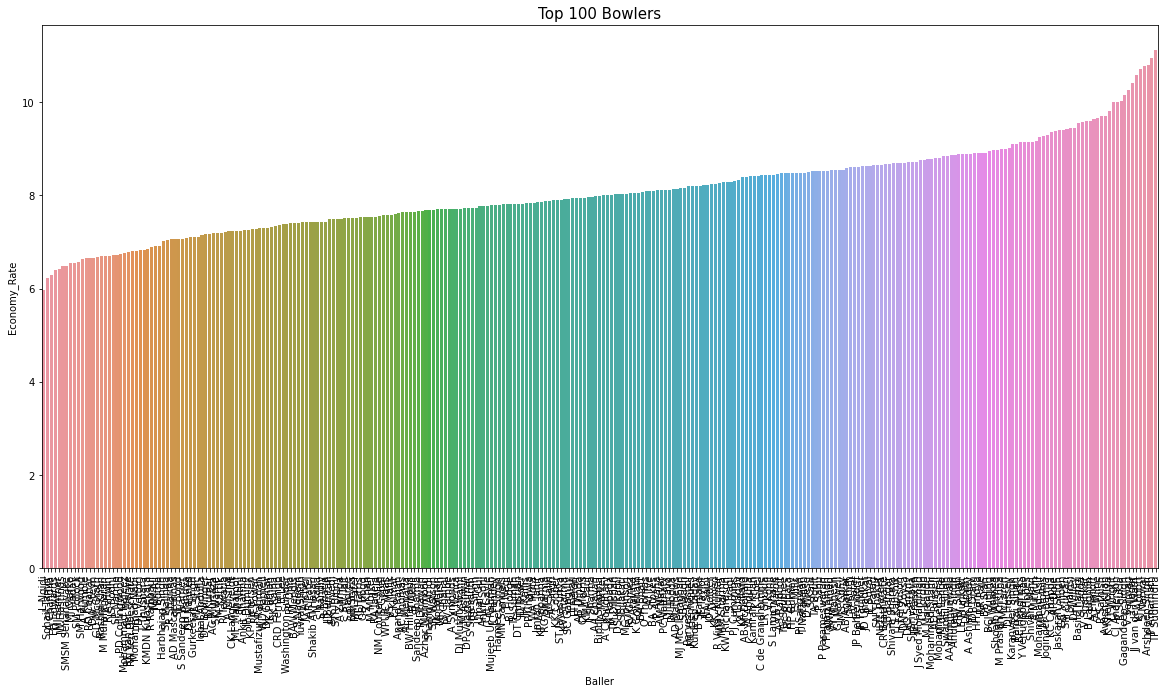

In [20]:
plt.figure(figsize=(20,10))
sns.barplot(data = bowler_data,x="Baller",y="Economy_Rate")
plt.xticks(rotation=90)
plt.title("Top 100 Bowlers",fontsize=15)
plt.show()